In [1]:
import pandas as pd
import numpy as np
import urllib.request
import matplotlib.pylab as plt
import sklearn.cluster
from sklearn.ensemble  import RandomForestClassifier as rfc
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
bbldata = pd.read_csv("bbldata_inner_join.csv")

In [3]:
len(bbldata)

11399

In [5]:
bbldata.columns

Index(['Unnamed: 0', 'BBL', 'ZipCode', 'YearAlter1', 'YearAlter2', 'YearBuilt',
       'UnitsRes', 'NumFloors', 'NumBldgs', 'BldgArea', 'OfficeArea',
       'ResArea', 'RetailArea', 'GarageArea',
       'Electricity Use - Grid Purchase (kBtu)',
       'Water Use (All Water Sources) (kgal)', 'Latitude', 'Longitude',
       'Site EUI (kBtu/ft²)', 'Total GHG Emissions (Metric Tons CO2e)',
       'Year Built', 'Age', 'Postcode', 'BIN', 'Extremely Low Income Units',
       'Very Low Income Units', 'Low Income Units', 'Moderate Income Units',
       'Middle Income Units', 'Other Income Units', 'Total Units', 'fraction',
       'yearbuilt'],
      dtype='object')

In [75]:
bbldata_filtered = bbldata[['BBL','Age','fraction','Electricity Use - Grid Purchase (kBtu)',
       'Water Use (All Water Sources) (kgal)','BldgArea', 'OfficeArea',
       'ResArea', 'RetailArea', 'GarageArea']]

In [76]:
bbldata_filtered.head()

,BBL,Age,fraction,Electricity Use - Grid Purchase (kBtu),Water Use (All Water Sources) (kgal),BldgArea,OfficeArea,ResArea,RetailArea,GarageArea
0,1.000048e+09,48.0,NaN,116307222.2,49920.3,1888126.0,1848626.0,0.0,39500.0,0.0
1,1.000050e+09,49.0,NaN,60067921.6,NaN,1016406.0,1016406.0,0.0,0.0,0.0
2,1.000058e+09,48.0,NaN,62199391.9,30656.2,559271.0,559271.0,0.0,0.0,0.0
3,1.000088e+09,33.0,NaN,7660120.0,NaN,169061.0,0.0,126420.0,42641.0,0.0
4,1.000090e+09,49.0,NaN,41724669.2,11992.8,692431.0,655773.0,0.0,5089.0,0.0


In [77]:
bbldata_filtered_agg = bbldata_filtered.dropna(subset=['fraction'])

In [78]:
bbldata_filtered_agg.shape

(177, 10)

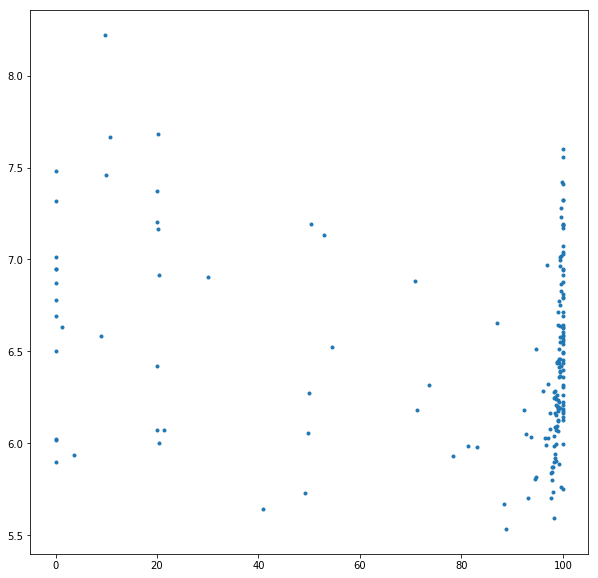

In [79]:
plt.figure(figsize=(10,10))
plt.plot(bbldata_filtered_agg['fraction'],np.log10(bbldata_filtered_agg['Electricity Use - Grid Purchase (kBtu)']),'.')

In [80]:
bbldata_filtered_agg_energy_usage = bbldata_filtered_agg[['Electricity Use - Grid Purchase (kBtu)','fraction']]

In [81]:
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(bbldata_filtered_agg_energy_usage)

In [82]:
kmeans.labels_

array([0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2], dtype=int32)

In [83]:
bbldata_filtered_agg0 = bbldata_filtered_agg[kmeans.labels_ == 0]
bbldata_filtered_agg1 = bbldata_filtered_agg[kmeans.labels_ == 1]
bbldata_filtered_agg2 = bbldata_filtered_agg[kmeans.labels_ == 2]

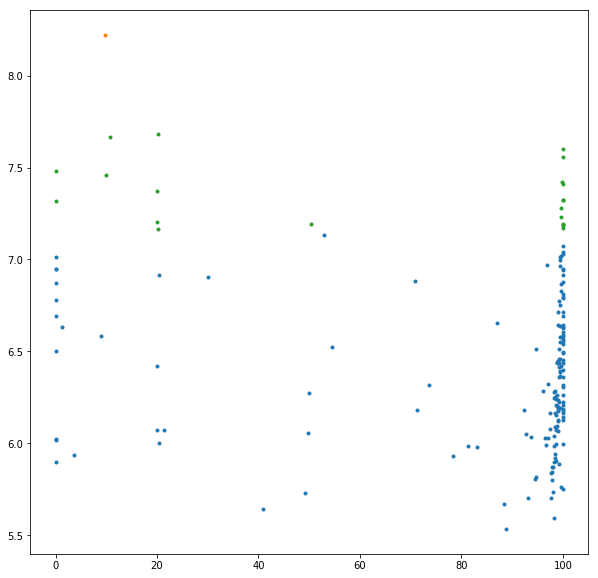

In [84]:
plt.figure(figsize=(10,10))
plt.plot(bbldata_filtered_agg0['fraction'],np.log10(bbldata_filtered_agg0['Electricity Use - Grid Purchase (kBtu)']),'.')
plt.plot(bbldata_filtered_agg1['fraction'],np.log10(bbldata_filtered_agg1['Electricity Use - Grid Purchase (kBtu)']),'.')
plt.plot(bbldata_filtered_agg2['fraction'],np.log10(bbldata_filtered_agg2['Electricity Use - Grid Purchase (kBtu)']),'.')

In [97]:
fraction_counts = bbldata_filtered_agg.groupby('fraction').count()

In [99]:
fraction_counts = fraction_counts[['BBL']]
fraction_counts['fraction'] = fraction_counts.index

In [106]:
fraction_counts.shape

(104, 2)

In [111]:
fraction_counts.label

fraction
0.000000      1
1.315789      1
3.703704      1
9.032258      1
9.674108      1
10.000000     1
10.698096     1
20.000000     1
20.028209     1
20.072993     1
20.161290     1
20.279720     1
20.304569     1
20.430108     1
21.428571     1
29.968454     1
40.909091     2
49.253731     2
49.671053     2
50.000000     2
50.272628     2
52.985885     2
54.421769     2
70.921986     2
71.232877     2
73.684211     2
78.333333     0
81.250000     0
83.076923     0
86.931818     0
             ..
99.056604     0
99.074074     0
99.090909     0
99.099099     0
99.166667     0
99.200000     0
99.212598     0
99.236641     0
99.259259     0
99.275362     0
99.300699     0
99.315068     0
99.363057     0
99.371069     0
99.388379     0
99.404762     0
99.415205     0
99.450549     0
99.492386     0
99.504950     0
99.537037     0
99.559471     0
99.581590     0
99.619772     0
99.686520     0
99.687500     0
99.693252     0
99.719888     0
99.819657     0
100.000000    0
Name: label, dt

In [107]:
bbldata_filtered_agg.shape

(177, 12)

In [101]:
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(fraction_counts)

In [131]:
bbldata_filtered_agg0 = bbldata_filtered_agg[bbldata_filtered_agg.fraction_grp == 0]
bbldata_filtered_agg1 = bbldata_filtered_agg[bbldata_filtered_agg.fraction_grp == 1]
bbldata_filtered_agg2 = bbldata_filtered_agg[bbldata_filtered_agg.fraction_grp == 2]

In [105]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Text(0,0.5,'Log of Energy Use(kBtu)')

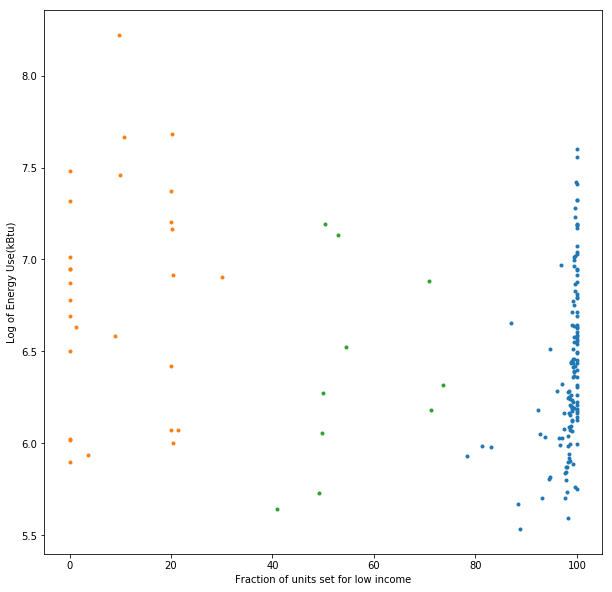

In [133]:
plt.figure(figsize=(10,10))
plt.plot(bbldata_filtered_agg0['fraction'],np.log10(bbldata_filtered_agg0['Electricity Use - Grid Purchase (kBtu)']),'.')
plt.plot(bbldata_filtered_agg1['fraction'],np.log10(bbldata_filtered_agg1['Electricity Use - Grid Purchase (kBtu)']),'.')
plt.plot(bbldata_filtered_agg2['fraction'],np.log10(bbldata_filtered_agg2['Electricity Use - Grid Purchase (kBtu)']),'.')
plt.xlabel("Fraction of units set for low income")
plt.ylabel("Log of Energy Use(kBtu)")

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(fraction_count_0['fraction'],np.log10(fraction_count_0['BBL']),'o',c='b')
plt.plot(fraction_count_1['fraction'],np.log10(fraction_count_1['BBL']),'o',c='r')
plt.plot(fraction_count_2['fraction'],np.log10(fraction_count_2['BBL']),'o',c='g')
plt.xlabel("Fraction of units set for low income")
plt.ylabel("Number of BBL's with the fraction of income set")

In [120]:
def fraction_calc(row):
    if row.fraction <30:
        val = 1
    elif (row.fraction >=30 and row.fraction<75):
        val = 2
    else :
        val = 0
    return val

In [121]:
bbldata_filtered_agg['fraction_grp'] = bbldata_filtered_agg.apply(fraction_calc,axis=1)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [122]:
bbldata_filtered_agg.head()

,BBL,Age,fraction,Electricity Use - Grid Purchase (kBtu),Water Use (All Water Sources) (kgal),BldgArea,OfficeArea,ResArea,RetailArea,GarageArea,energy/area,fraction_grp
327,1.002470e+09,39.0,96.938776,9320522.0,68959.2,657592.0,1000.0,654592.0,2000.0,0.0,14.173716,0
352,1.003330e+09,52.0,99.819657,26411072.2,NaN,1191180.0,0.0,1176100.0,15080.0,0.0,22.172192,0
365,1.003820e+09,68.0,0.000000,10372673.2,NaN,553660.0,0.0,553660.0,0.0,0.0,18.734735,1
369,1.003950e+09,38.0,100.000000,2494448.9,NaN,127950.0,0.0,127950.0,0.0,0.0,19.495497,0
370,1.003950e+09,45.0,99.275362,2606679.8,9679.0,100860.0,0.0,100860.0,0.0,0.0,25.844535,0


In [95]:
bbldata_filtered_agg['fraction_grp'] = kmeans.labels_

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [96]:
bbldata_filtered_agg

,BBL,Age,fraction,Electricity Use - Grid Purchase (kBtu),Water Use (All Water Sources) (kgal),BldgArea,OfficeArea,ResArea,RetailArea,GarageArea,energy/area,fraction_grp
327,1.002470e+09,39.0,96.938776,9320522.0,68959.2,657592.0,1000.0,654592.0,2000.0,0.0,14.173716,0
352,1.003330e+09,52.0,99.819657,26411072.2,NaN,1191180.0,0.0,1176100.0,15080.0,0.0,22.172192,2
365,1.003820e+09,68.0,0.000000,10372673.2,NaN,553660.0,0.0,553660.0,0.0,0.0,18.734735,0
369,1.003950e+09,38.0,100.000000,2494448.9,NaN,127950.0,0.0,127950.0,0.0,0.0,19.495497,0
370,1.003950e+09,45.0,99.275362,2606679.8,9679.0,100860.0,0.0,100860.0,0.0,0.0,25.844535,0
507,1.005240e+09,52.0,100.000000,4019608.9,8670.7,212832.0,0.0,212832.0,0.0,0.0,18.886300,0
600,1.005590e+09,24.0,100.000000,3856176.3,5703.9,108817.0,21817.0,87000.0,0.0,0.0,35.437260,0
1636,1.008790e+09,19.0,99.388379,5630458.2,NaN,101857.0,0.0,93757.0,8100.0,0.0,55.278068,0
1793,1.009200e+09,55.0,20.161290,47996764.6,NaN,898734.0,887434.0,0.0,11300.0,0.0,53.404861,2
1847,1.009720e+09,71.0,9.674108,166404374.5,NaN,8942176.0,16820.0,8367942.0,77414.0,480000.0,18.608935,1


In [85]:
bbldata_filtered_agg.columns

Index(['BBL', 'Age', 'fraction', 'Electricity Use - Grid Purchase (kBtu)',
       'Water Use (All Water Sources) (kgal)', 'BldgArea', 'OfficeArea',
       'ResArea', 'RetailArea', 'GarageArea'],
      dtype='object')

In [86]:
bbldata_filtered_agg['energy/area'] = (bbldata_filtered_agg['Electricity Use - Grid Purchase (kBtu)']/bbldata_filtered_agg['BldgArea'])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [123]:
input = bbldata_filtered_agg[['Age','fraction_grp','BBL']]

In [124]:
output = bbldata_filtered_agg['energy/area'].astype(int)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(input,output, test_size=0.33, random_state=42)

In [126]:
len(X_test)

59

In [127]:
output.dtypes

dtype('int64')

In [128]:
clf =  rfc().fit(X=X_train,y= y_train)
clf.score(X_test, y_test)

0.050847457627118647

In [129]:
y_pred = clf.predict(X_test)

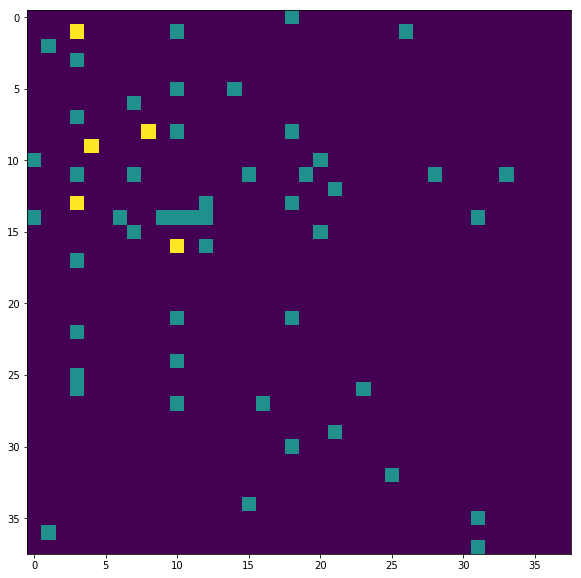

In [134]:
plt.figure(figsize=(10,10))
imshow(confusion_matrix(y_test, y_pred))